<a href="https://colab.research.google.com/github/Ram5268/ECON3916-Statistical-Machine-Learning/blob/main/Econ_3916_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [10]:
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000,5000,20)
latency_logs = np.concatenate( [normal_traffic, spike_traffic])

latency_logs = np.random.permutation(latency_logs)

latency_logs[:10], latency_logs.shape

(array([41, 32, 20, 47, 33, 32, 47, 26, 23, 48]), (1000,))

In [11]:
def calculate_mad(data):
    data = np.asarray(data)
    med = np.median(data)
    abs_dev = np.median(np.abs(data - med)) # Corrected: Calculate abs_dev
    return abs_dev # Added: return abs_dev

mad_latency = calculate_mad(latency_logs) # Corrected: function name typo
sd_latency = np.std(latency_logs, ddof=1) # Corrected: variable name typo

median_latency = np.median(latency_logs) # Corrected: variable name syntax
mean_latency = np.mean(latency_logs)

print(f"Mean Latency: {mean_latency:.2f} ms")
print(f"Median Latency: {median_latency:.2f} ms")
print(f"SD (sample): {sd_latency:.2f} ms")
print(f"MAD: {mad_latency:.2f} ms")

Mean Latency: 95.91 ms
Median Latency: 36.00 ms
SD (sample): 459.12 ms
MAD: 8.00 ms


In [12]:
def bayesian_audit(prior, sensitivity, specificity):
    prior = float(prior)
    sensitivity = float(sensitivity)
    specificity = float(specificity)

    p_flag_given_cheater = sensitivity
    p_flag_given_not = 1.0 - specificity

    numerator = p_flag_given_cheater * prior
    denominator = (p_flag_given_cheater * prior) + (p_flag_given_not * (1.0 - prior))
    return numerator / denominator

sensitivity = .98
specificity = .98

scenarios = {
    "Scenario A (Bootcamp) prior=50%": 0.50,
    "Scenario B (Econ Class) prior=5%": 0.05,
    "Scenario C (Honors Seminar) prior-.1%": 0.001,
}

for name, prior in scenarios.items():
  post = bayesian_audit(prior, sensitivity, specificity)
  print(f"{name} -> P(Cheater | Flagged) = {post:.4f} ({post*100:.2f}%)")

Scenario A (Bootcamp) prior=50% -> P(Cheater | Flagged) = 0.9800 (98.00%)
Scenario B (Econ Class) prior=5% -> P(Cheater | Flagged) = 0.7206 (72.06%)
Scenario C (Honors Seminar) prior-.1% -> P(Cheater | Flagged) = 0.0468 (4.68%)


In [13]:
control_users = 50250
treatment_users = 49750

observed = np.array([control_users, treatment_users], dtype=float)

total = observed.sum()
expected = np.array([total/2, total/2], dtype=float)

chi_sq = np.sum((observed - expected)**2 / expected)

print("Observed:", observed.astype(int))
print("Expected:", expected.astype(int))
print(f"Chi-Square Statistic: {chi_sq:.4F}")

threshold = 3.84
if chi_sq > threshold:
  print("INVALID EXPERIMENT: SRM Detected (Chi-Square > 3.84).")
else:
  print("No SRM at p<0.05 threshold (Chi-Square <= 3.84).")

Observed: [50250 49750]
Expected: [50000 50000]
Chi-Square Statistic: 2.5000
No SRM at p<0.05 threshold (Chi-Square <= 3.84).


In [14]:
np.random.seed(42)

n_tokens = 10_000

alpha = 3.0
scale = 1_000
peak_market_cap = scale * (np.random.pareto(alpha, n_tokens) + 0.001)

df_all = pd.DataFrame({
    "token_id": np.arange(n_tokens),
    "peak_market_cap": peak_market_cap
})

cutoff = df_all["peak_market_cap"].quantile(0.99)
df_survivors = df_all[df_all["peak_market_cap"] >= cutoff].copy()

print("All tokens:", len(df_all))
print("Survivors (top 1%):", len(df_survivors))
print(f"Mean peak market cap (ALL): ${df_all['peak_market_cap'].mean():,.2f}")
print(f"Mean peak market cap (SURVIVORS): ${df_survivors['peak_market_cap'].mean():,.2f}")

All tokens: 10000
Survivors (top 1%): 100
Mean peak market cap (ALL): $481.64
Mean peak market cap (SURVIVORS): $5,328.32


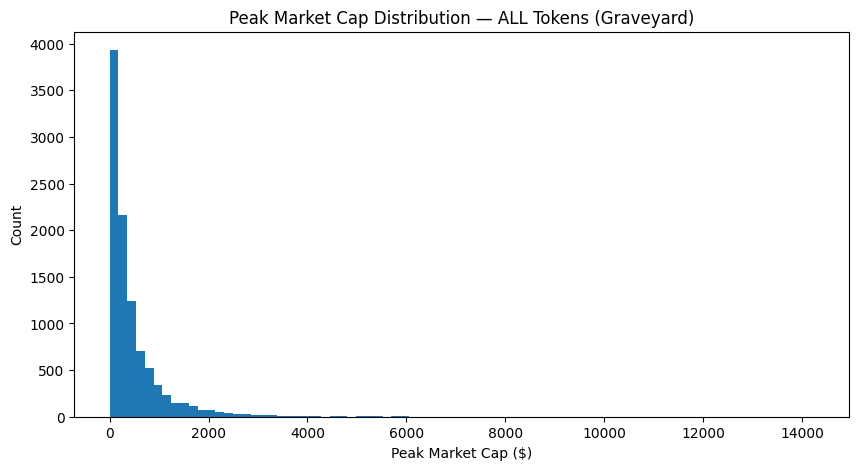

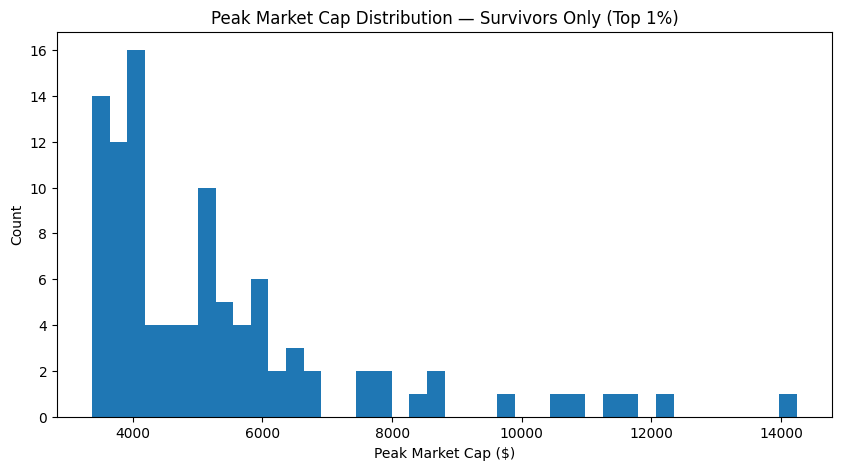

In [15]:
# CELL 6 — Phase 4.1: Dual Histograms (Matplotlib)
plt.figure(figsize=(10,5))
plt.hist(df_all["peak_market_cap"], bins=80)
plt.title("Peak Market Cap Distribution — ALL Tokens (Graveyard)")
plt.xlabel("Peak Market Cap ($)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,5))
plt.hist(df_survivors["peak_market_cap"], bins=40)
plt.title("Peak Market Cap Distribution — Survivors Only (Top 1%)")
plt.xlabel("Peak Market Cap ($)")
plt.ylabel("Count")
plt.show()
